In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
df= pd.read_csv("IMDb Movies India.csv", encoding="latin1")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [32]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [35]:
df.shape

(15509, 10)

In [36]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [39]:
df.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [40]:
df.isnull().sum()

Name           0
Year         282
Duration    4839
Genre          0
Rating      3810
Votes       3809
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [41]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [42]:
df['Duration'] = df['Duration'].str.strip('min').str.strip()  # Remove 'min' and any extra spaces
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')  # Convert to numeric, setting errors to NaN

# Fill missing values with the median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [43]:
df.isnull().sum()

Name           0
Year         282
Duration       0
Genre          0
Rating      3810
Votes       3809
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [44]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11368 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11368 non-null  object 
 1   Year      11086 non-null  object 
 2   Duration  11368 non-null  float64
 3   Genre     11368 non-null  object 
 4   Rating    7558 non-null   float64
 5   Votes     7559 non-null   object 
 6   Director  11368 non-null  object 
 7   Actor 1   11368 non-null  object 
 8   Actor 2   11368 non-null  object 
 9   Actor 3   11368 non-null  object 
dtypes: float64(2), object(8)
memory usage: 976.9+ KB


In [45]:
top_movie = df.loc[df['Rating'].sort_values(ascending=False)[:10].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),133.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,(2020),113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,(2019),105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,(2021),93.0,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,(2021),56.0,"Documentary, History",9.3,"1,373",Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,(2019),90.0,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,(2021),101.0,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,(2018),97.0,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


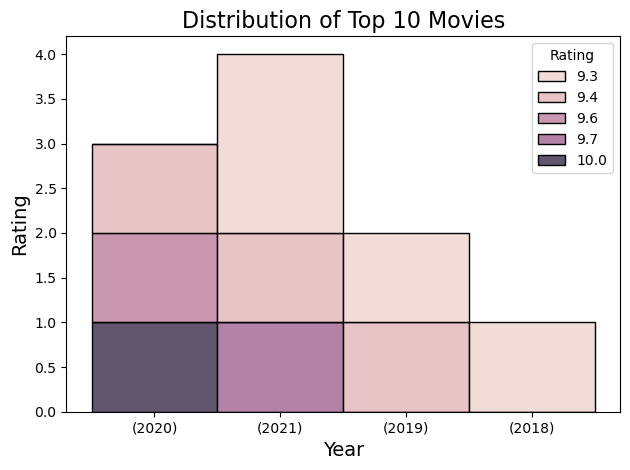

In [46]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

In [47]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,2197
1,Action,1005
2,Romance,517
3,"Drama, Romance",512
4,"Action, Crime, Drama",454


In [48]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,2197
1,Action,1005
2,Romance,517
3,"Drama, Romance",512
4,"Action, Crime, Drama",454


In [49]:
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
3557,Saif Ali Sayeed,10.0
4061,Sriram Raja,9.7
812,Bobby Kumar,9.6
522,Arvind Pratap,9.4
2400,Munni Pankaj,9.4
4122,Suhrud Godbole,9.4
2550,Nikhil Mahar,9.3
4463,Venkatesh Bk,9.3
2996,Rahul Mallick,9.3
2972,Raghav Jairath,9.3


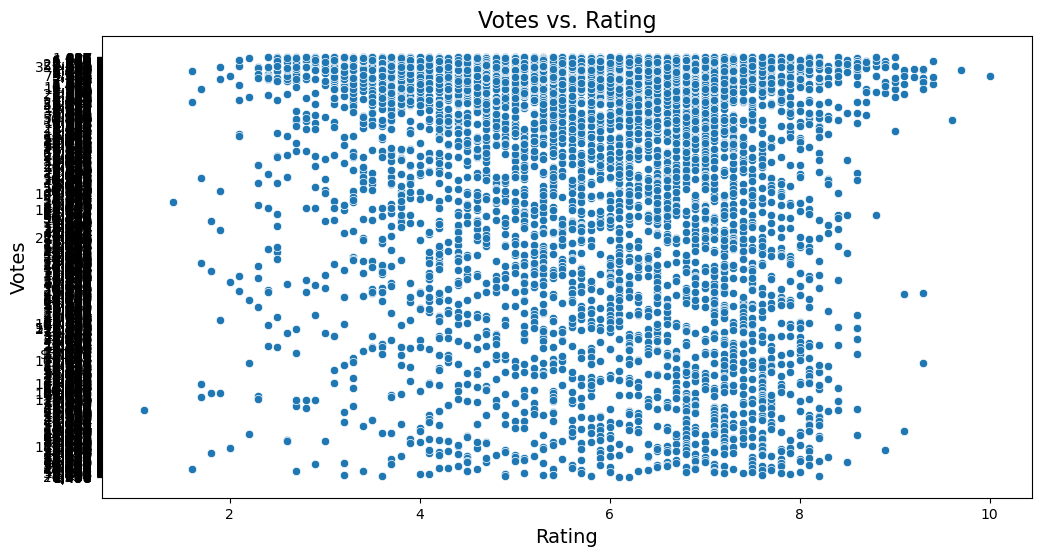

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rating', y='Votes',palette= "deep")

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()
     

In [52]:
actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Ashok Kumar,148
1,Dharmendra,140
2,Jeetendra,140
3,Mithun Chakraborty,133
4,Amitabh Bachchan,123
5,Rajesh Khanna,119
6,Shashi Kapoor,91
7,Dev Anand,90
8,Akshay Kumar,87
9,Sanjeev Kumar,82


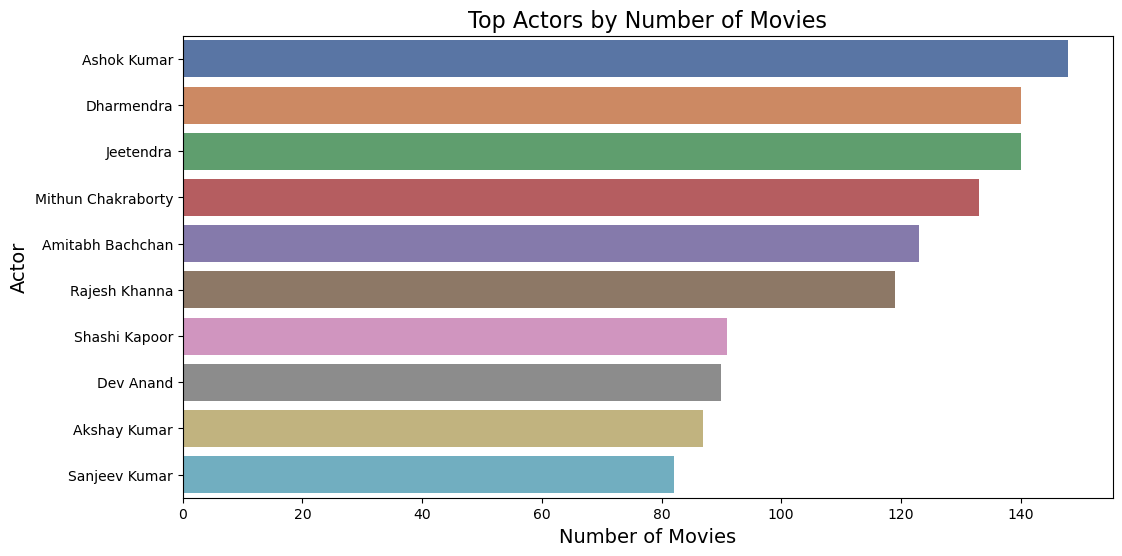

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h',palette= "deep")

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()
     

In [54]:
yearly_movie_counts = df['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts
     

,Year,MovieCount
93,(1917),1
92,(1928),1
91,(1931),7
89,(1932),9
88,(1933),12
...,...,...
2,(2018),301
0,(2019),347
4,(2020),261
1,(2021),319


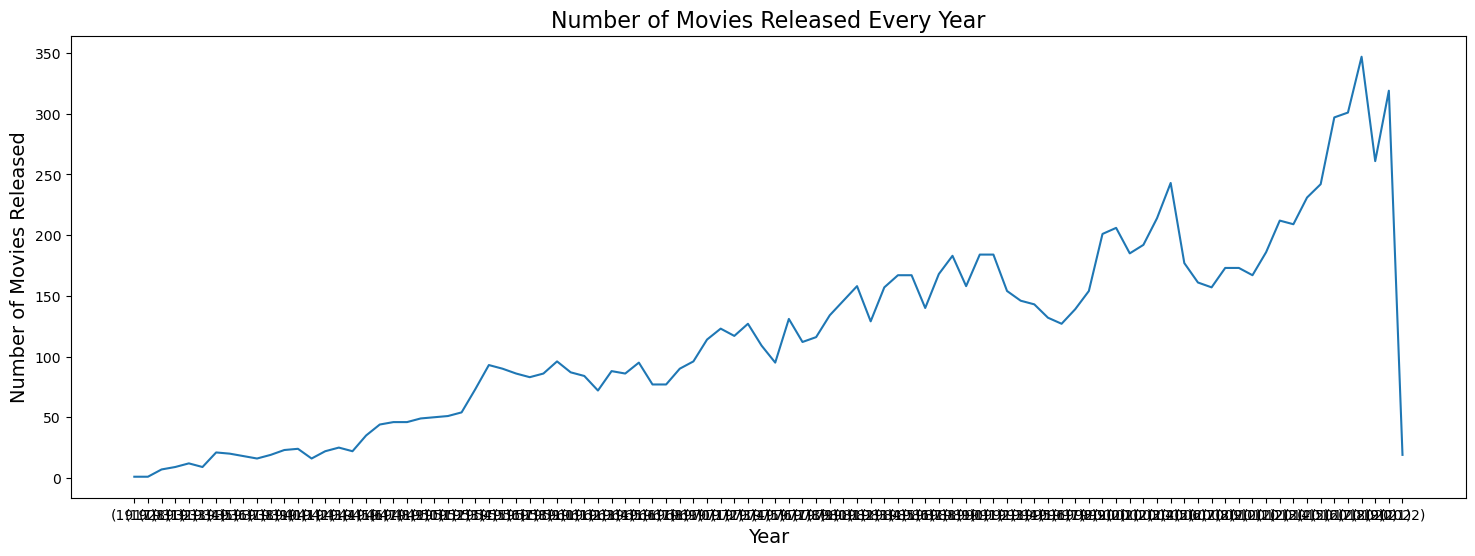

In [67]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()

In [78]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)
     

Rating      1.000000
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025113
Duration    0.002565
Director   -0.003680
Genre            NaN
Name: Rating, dtype: float64

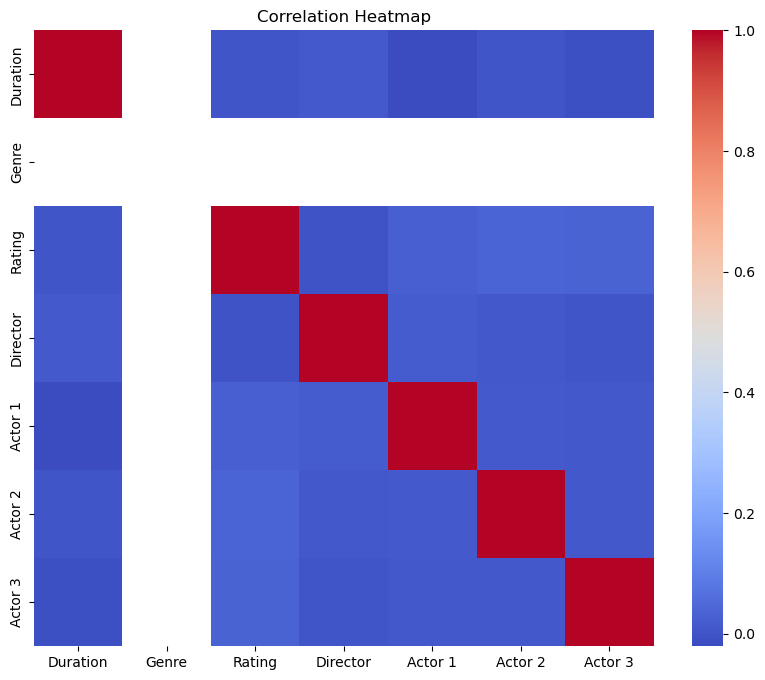

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df,annot=False,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

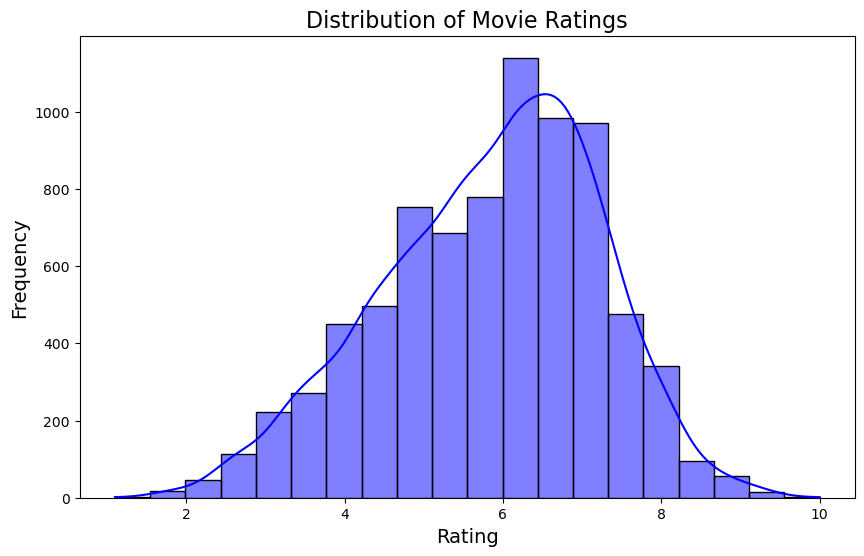

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


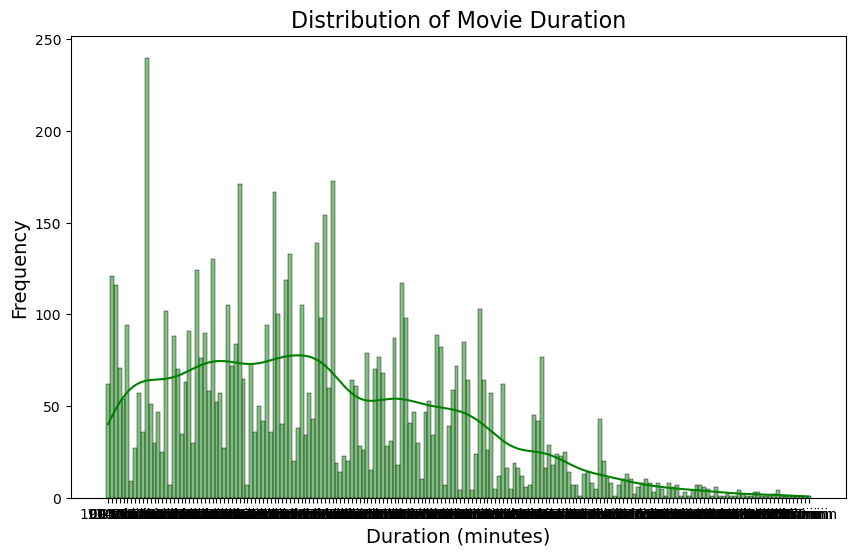

In [98]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=20, kde=True, color='green')
plt.title('Distribution of Movie Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


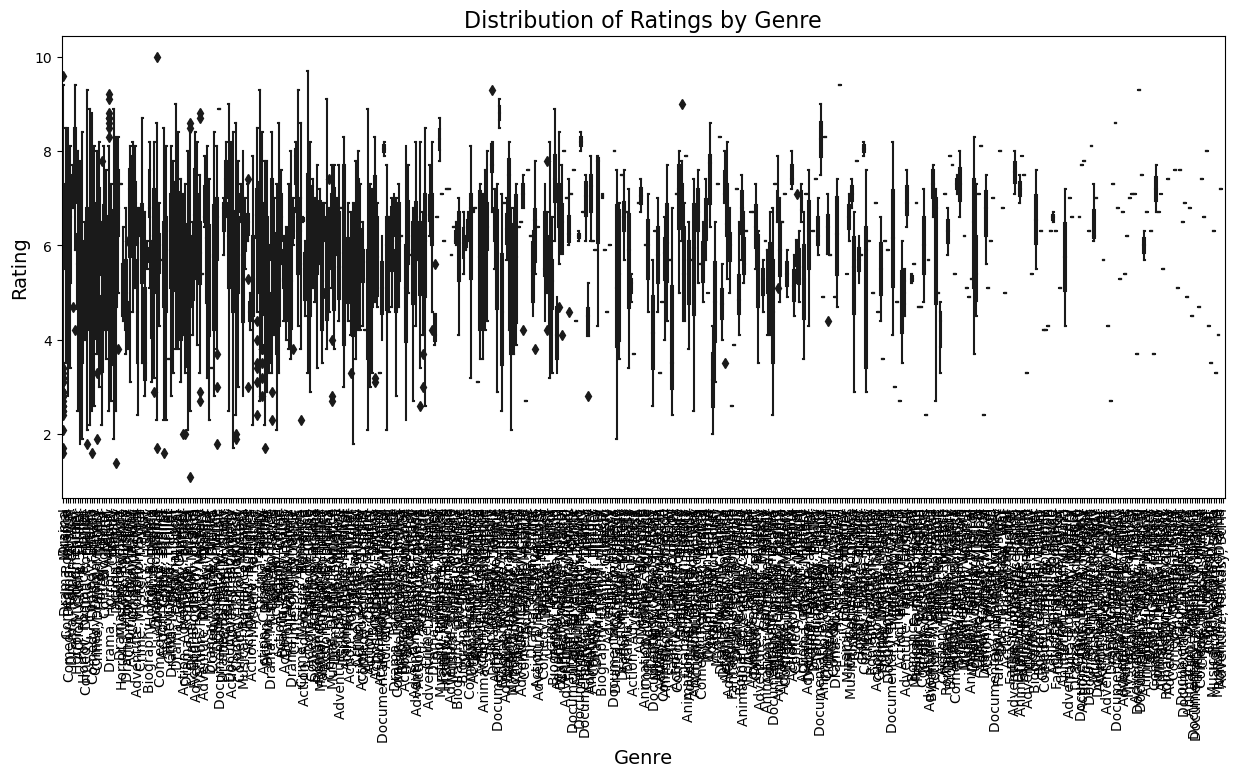

In [99]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Genre', y='Rating', palette='viridis')
plt.title('Distribution of Ratings by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=90)
plt.show()


[nan '8' '35' ... '70,344' '408' '1,496']


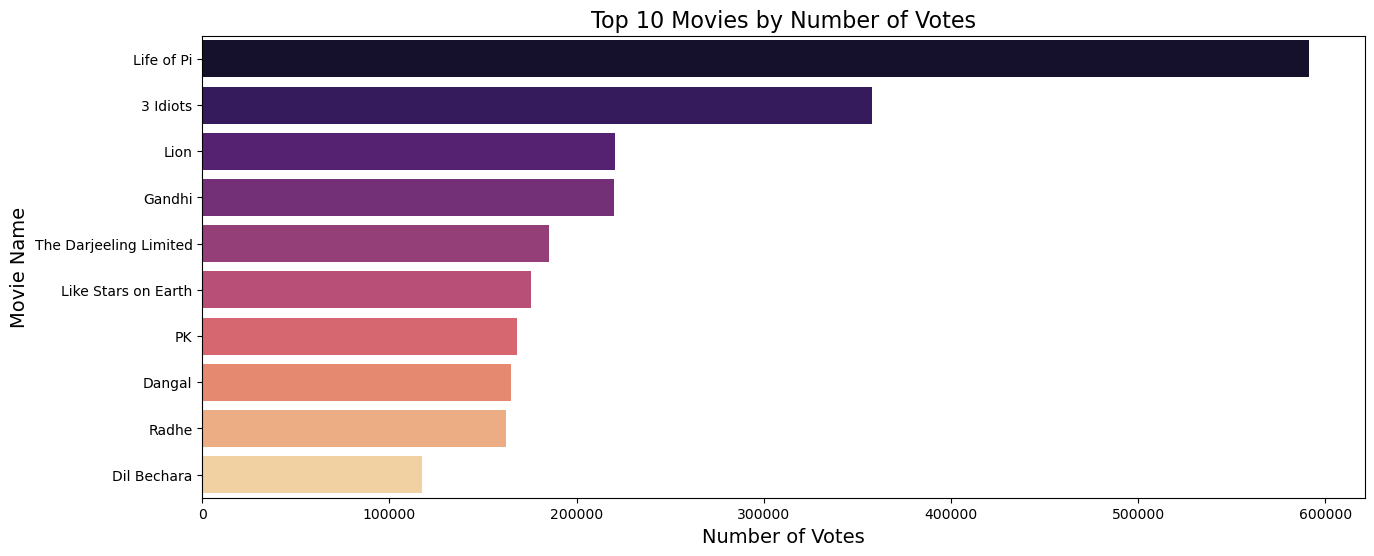

In [106]:
# Print unique values in 'Votes' to understand its format
print(df['Votes'].unique())

# Remove any non-numeric characters from 'Votes' (e.g., $, M, etc.)
df['Votes'] = df['Votes'].replace('[\$,M]', '', regex=True).astype(float)

# Now use nlargest to get the top 10 movies by number of votes
top_voted_movies = df.nlargest(10, 'Votes')

# Plot the top 10 movies by number of votes
plt.figure(figsize=(15, 6))
sns.barplot(data=top_voted_movies, x='Votes', y='Name', palette='magma')
plt.title('Top 10 Movies by Number of Votes', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Movie Name', fontsize=14)
plt.show()


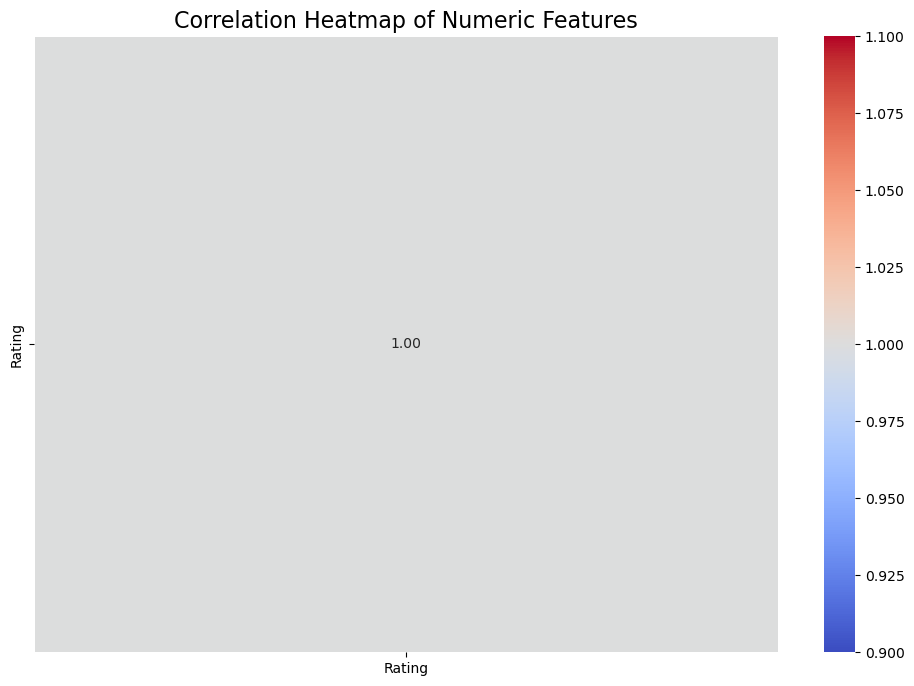

In [102]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


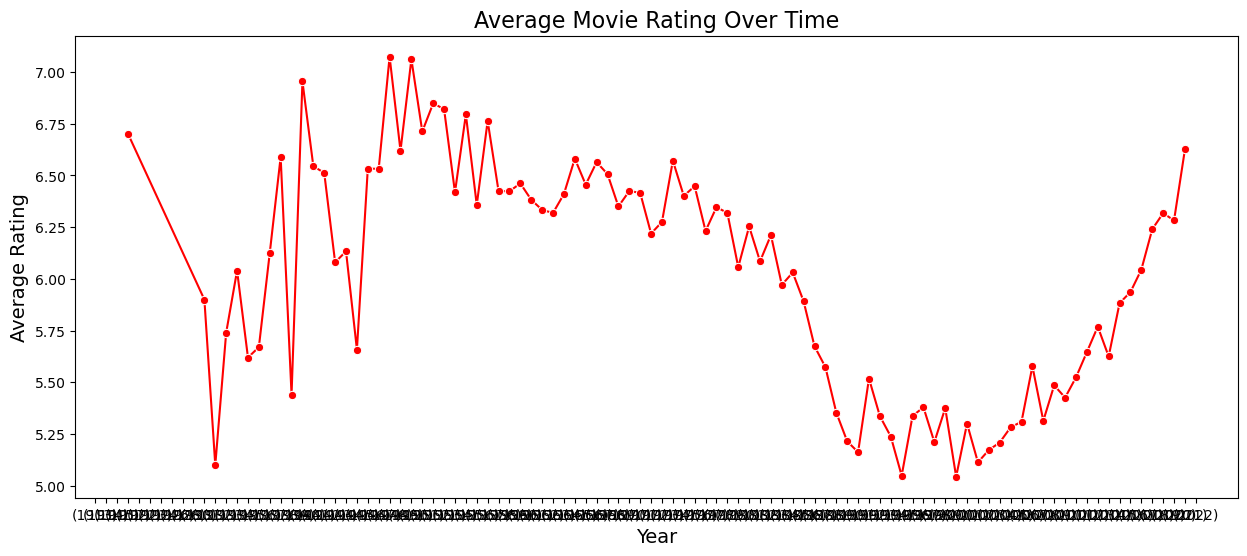

In [103]:
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=average_rating_by_year, x='Year', y='Rating', marker='o', color='red')
plt.title('Average Movie Rating Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()


In [107]:
# Clean 'Votes' column: remove commas and convert to numeric
df['Votes'] = df['Votes'].replace('[\$,]', '', regex=True).astype(float)

# Clean 'Duration' column: remove 'min' and convert to numeric
df['Duration'] = df['Duration'].str.replace('min', '').astype(float)

# Handle missing values: drop rows where 'Votes' or 'Duration' or 'Rating' is NaN
df = df.dropna(subset=['Votes', 'Duration', 'Rating'])

# Feature selection and target variable
features = ['Votes', 'Duration']  # You can add more features as needed
target = 'Rating'

X = df[features]  # No need to dropna here since we handled missing values above
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 1.1126605466240604
Mean Squared Error: 1.882718216496412
R-squared Score: -0.011933119209108112
